# Принятие решений в бизнесе

### Описание проекта

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки  крупного интернет-магазина.
Приоритезируем гипотезы, запустим A/B-тест и проанализируем результаты. 

**Часть 1. Приоритизация гипотез.**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

#### Описание данных

**Данные для первой части**

Файл `/datasets/hypothesis.csv.`

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv.`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv.`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Знакомство с данными и предобработка

Загрузим данные

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats

from scipy import stats as st

# убираем scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# снимаем ограничение на количество столбцов и их ширину
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

Посмотрим на датасеты

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Датасет `hypothesis` содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [4]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
693,3244441077,3803269165,2019-08-09,590,B
584,1126146019,2705308997,2019-08-20,50,A
1143,3551685910,2397025226,2019-08-13,910,B
1060,2518195580,4163850406,2019-08-11,8950,A
975,3492564891,228221722,2019-08-22,12336,B


Здесь данные о заказах и их стомости 

In [5]:
visitors.sample(5)

,date,group,visitors
8,2019-08-09,A,617
26,2019-08-27,A,711
23,2019-08-24,A,395
46,2019-08-16,B,413
16,2019-08-17,A,412


Данные о посещениях.

В датасетах `orders` и `visitors` хранятся резулььтаты A/B теста.

#### Проверка полных дубликатов

In [6]:
print('Количество полных дубликатов в orders', orders.duplicated().sum())
print('Количество полных дубликатов в visitors', visitors.duplicated().sum())

Количество полных дубликатов в orders 0
Количество полных дубликатов в visitors 0


Как мы видим, в данных нет дубликатов



#### Предобработка данных

Проверим формат данных

In [7]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Изменим формат для столбцов с датами

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Изменим формат названия столбцов, а также уберем из них пробелы (заменим их на '_')

In [9]:
hypothesis.columns = [name.lower().replace(' ', '_') for name in hypothesis.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
visitors.columns = [name.lower().replace(' ', '_') for name in visitors.columns]

Проверим названия столбцов еще раз

In [10]:
display(hypothesis.columns)
display(orders.columns)
display(visitors.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

В данном разделе исправил форматы данных для дат, а также изменил названия столбцов на нижний регистр.
После проверки данных, мы видим, что в данных нет полных дубликатов.

### Часть 1. Приоритизация гипотез.

Посмотрим на список гипотез, полученный от отдела маркетинга.

In [11]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Мы видим, что гипотезы оценили по модели RICE - (Reach, Impact, Confidence, Effort). В процессе приоритизации, мы можем использовать как фреймворк RICE, так и ICE, который не учитывает параметр Reach. Проведем расчет с помощью каждого из фреймворков и сравним результаты.

#### Применим фреймворк ICE для приоритизации гипотез.

In [12]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Используя фреймворк ICE мы получили ТОП 5 гипотез

#### Применим фреймворк RICE для приоритизации гипотез.

In [13]:
hypothesis['ice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


#### Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

ТОП 5 гипотез, полученный фреймворком RICE сильно отличается от того, который мы видели в ICE.
Напримр, гипотеза №1 в ICE при расчете через RICE опустилась на последнее место.
Такие изменения можно связать с тем, что у этой гипотезы был маленький показатель reach относительно остальных гипотез.

### Часть 2. Анализ A/B-теста

В данном разделе мы рассмотрим результаты A/B-теста которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

#### Построим графики кумулятивных метрик

##### График кумулятивной выручки по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group']
                                   )].agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionid' : 'nunique', 
                                           'visitorid' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group']
                                     )].agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      24      20   148579       719       0.033
1 2019-08-01     B      21      20   101217       713       0.029
2 2019-08-02     A      44      38   242401      1338       0.033
3 2019-08-02     B      45      43   266748      1294       0.035
4 2019-08-03     A      68      62   354874      1845       0.037


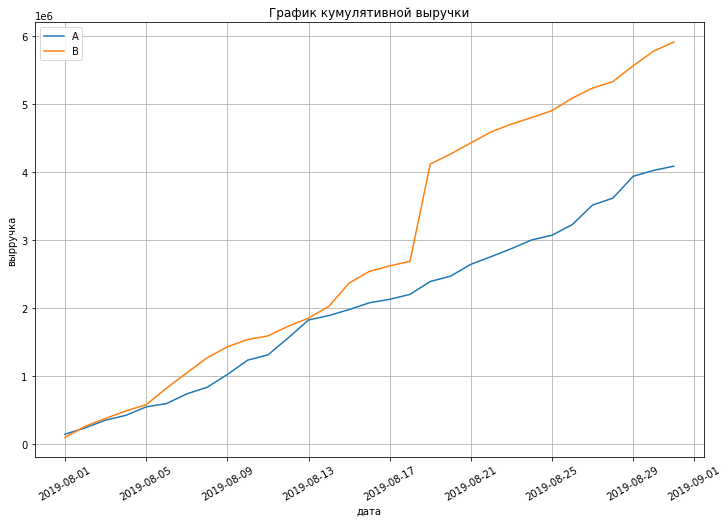

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date',
                                                                   'revenue', 
                                                                   'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date',
                                                                   'revenue', 
                                                                   'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xlabel('дата')
plt.ylabel('вырручка')
plt.title('График кумулятивной выручки')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

На графике мы видим, что кумулятивная выручка группы A растет равномерно, тогда как показатель группы B испытал сильный скачек 2019.08.18.

Это может означать, что в этот день был сделан большой заказ, либо количество заказов резко возросло. Так или иначе, это свидетельствует об аномальных данных в выборке

##### График кумулятивного среднего чека по группам

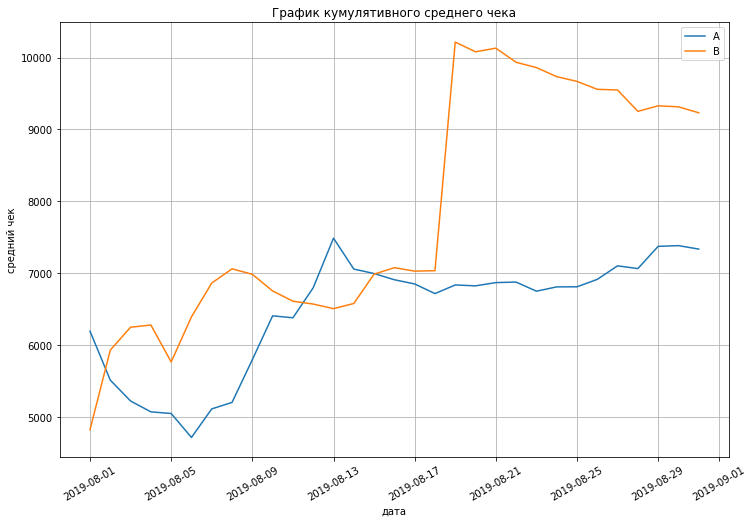

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
         label = 'A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
         label = 'B')

plt.legend()
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('График кумулятивного среднего чека')
plt.grid(True)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Изучив график можно сделать вывод, что показатель группы A сильно колебался в начале теста, но к 2017.08.09 стабилизировался. 

Что касается группы B, здесь мы снова (как и при анализе кумулятивной выручки) видим сильный скачок 2019.08.18. Скорее всего дело крупных заказах, которые были сделаны в этот день.

##### График относительного изменения кумулятивного среднего чека группы B к группе A

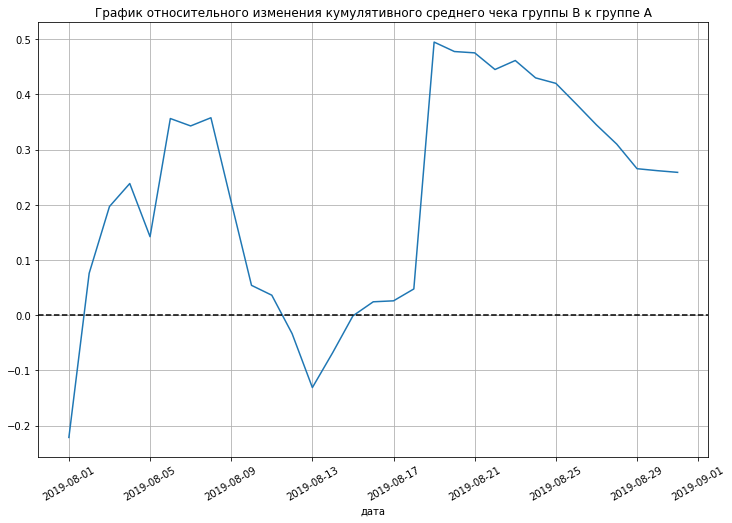

In [17]:
# объединим таблицы с результатами группы A и B
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']
     /mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']
      /mergedCumulativeRevenue['ordersA'])-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

Резкие изменения между сегментами, которые мы видим на графике, означают, что в выборках присутствуют аномальные значения

##### График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам 

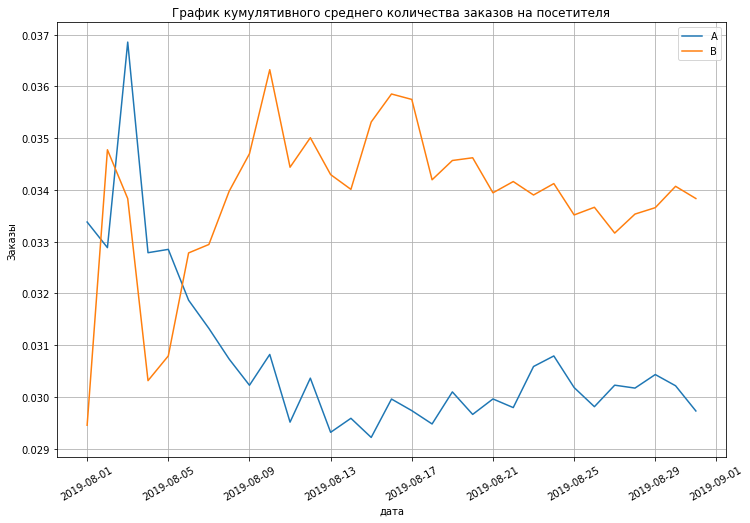

In [18]:
# датафрейм с кумулятивным количеством заказов на посетителя в группе A
cumulativeOrderVisitorA = cumulativeData[cumulativeData['group']=='A'][['date', 
                                                                 'orders', 
                                                                 'visitors', 
                                                                 'group']]

# датафрейм с кумулятивным количеством заказов на посетителя в группе B
cumulativeOrderVisitorB = cumulativeData[cumulativeData['group']=='B'][['date', 
                                                                 'orders', 
                                                                 'visitors', 
                                                                 'group']]


# Строим график с кумулятивным количеством заказов на посетителя в группе A
plt.figure(figsize=(12, 8))
plt.plot(
    cumulativeOrderVisitorA['date'], 
    cumulativeOrderVisitorA['orders']
    /cumulativeOrderVisitorA['visitors'], 
    label='A')

# Строим график с кумулятивным количеством заказов на посетителя в группе B
plt.plot(
    cumulativeOrderVisitorB['date'], 
    cumulativeOrderVisitorB['orders']
    /cumulativeOrderVisitorB['visitors'], 
    label='B')

plt.legend() 
plt.xlabel('дата')
plt.ylabel('Заказы')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

На графике видно, что количество заказов в для группы B значительно превышает количество заказов для группы A. С 2019.08.05 мы видим, что заказы в группе B начинают расти, тогда как заказы в A падают.

##### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

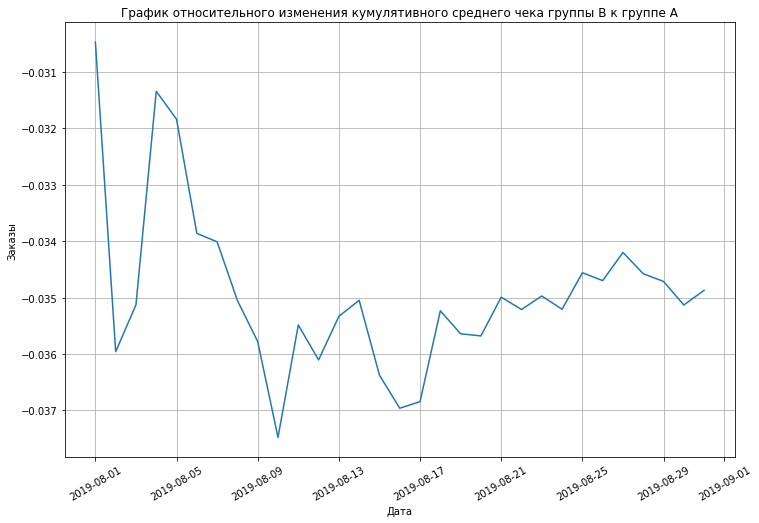

In [19]:
# объединим таблицы с результатами группы A и B
mergedCumulativeOrder = cumulativeOrderVisitorA.merge(
    cumulativeOrderVisitorB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних заказов
plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeOrder['date'], 
    (mergedCumulativeOrder['ordersB'] 
     / mergedCumulativeOrder['visitorsB']) 
    / ((mergedCumulativeOrder['ordersA'] 
        / mergedCumulativeOrder['visitorsA'])-1)
)

# добавляем ось X
# plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

Видно, что показатели группы B колеблется в диапазоне 5 - 15% ниже, чем у A. К концу наблюдаемого периода разница составляет ~10%

На графике видно, что группа B отстает от A по среднему чеку, на начало теста разрыв составлял ~3%. На конец наблюдаемого периода группа B отстает от A на 3.5%

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

In [21]:
ordersByUsers  = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers .columns =  ['visitorid', 'orders']

In [22]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали больше 5 заказов.

Построим гистограмму распределения количества заказов.

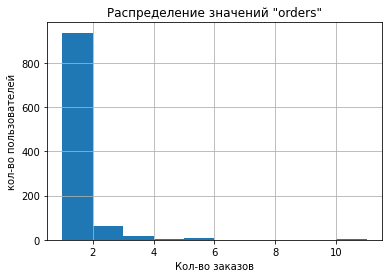

In [23]:
plt.hist(ordersByUsers['orders']) 
plt.xlabel('Кол-во заказов')
plt.ylabel('кол-во пользователей')
plt.title('Распределение значений "orders"')
plt.grid(True)
plt.show()

На гистограмме видно, что большинство пользователей совершили 1 - 3 заказа, Но есть и исключения, пользователи сделавшие больше 5 заказов

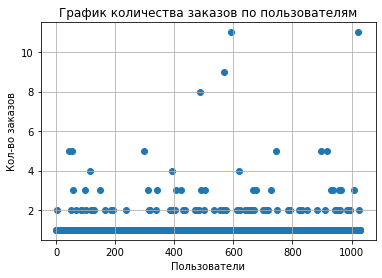

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.title('График количества заказов по пользователям')
plt.grid(True)
plt.show()

Как и на гистограмме выше, мы видим, что большинство пользователей делают от 1 до 4 заказов. 5 и более заказов - это редкость. Чтобы окончательно понять, какие значения считать выбросами, посчитаем процентили.

#### 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

Рассчитаем 90 и 95 процентиль

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Получается, что не более 5% пользователей сделали больше 2 заказов и только 1% больше 4 (включительно).

Обозначим верхний предел количества заказов для одного пользователя как 4

#### Точечный график стоимостей заказов

Как и в предыдущем разделе, построим гистограмму.

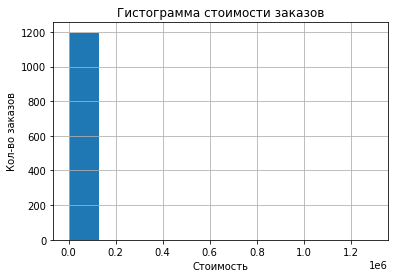

In [26]:
plt.hist(orders['revenue']) 
plt.xlabel('Стоимость')
plt.ylabel('Кол-во заказов')
plt.title('Гистограмма стоимости заказов')
plt.grid(True)
plt.show()

Не самая наглядная гистограмма, воспользуемся диаграммой рассеяния

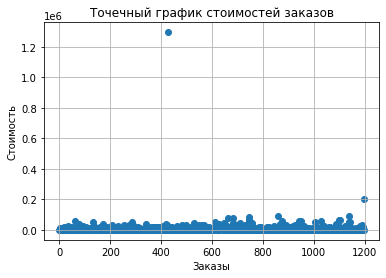

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.title('Точечный график стоимостей заказов')
plt.grid(True)
plt.show()

Мы видим заказ почти на 1.3 млн. из-за этого диаграмма получается ненаглядной. Добавим ограничение по оси Y, чтобы было проще читать график

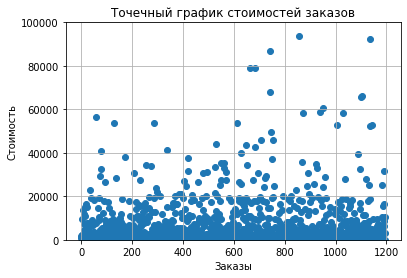

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.title('Точечный график стоимостей заказов')
plt.ylim(0, 100000)
plt.grid(True)
plt.show()

Большинство заказов находится в промежутке до 20000. Совсем немного заказов обходятся для пользователей больше, чем в 60000

#### 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Посмотрев на процентили и диаграмму рассеяния, ограничим данные по 99 процентилю -  **58233.2**

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

В предыдущих разделах проекта мы изучали результаты A/B теста. Общий вывод - в данных есть выбросы, аномальные значения.

В данном разделе проверим, как влияют и влияют ли вообще эти выбросы на конверсию в группах.

Начнем с расчета статистической значимости по сырым данным - т.е. по тем, из которых мы не удаляли аномальные значения.

Сформулируем нулевую и альтернативную гипотезы:

- **H0** - между группами нет различий в среднем количестве заказов
- **H1** - между группами есть различий в среднем количестве заказов

Начнем с подготовки данных. Как известно, данные о продажах и средних редко бывают распределены нормально, поэтому, для проверки гипотез воспользуемся непараметрическим тестом Уилкоксона-Манна-Уитни.

Уровень значимости установим как 0.05

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Напомним названия столбцов данных:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA`  — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitorsid', 'transactionid']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(
                                   data['visitorsPerDateA'].sum() - 
                                   len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index=np.arange(
                                   data['visitorsPerDateB'].sum() - 
                                   len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0) 

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой

Гипотезы:
- **H0** - между группами нет различий в среднем количестве заказов
- **H1** - между группами есть различий в среднем количестве заказов

In [33]:
alpha = .05 
results = stats.mannwhitneyu(sampleA, sampleB)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-значение:  0.017
Отвергаем нулевую гипотезу
относительный выигрыш группы B: 0.138


Анализируя различия в количестве заказов между группами мы видим, что нулевая гипотеза отвергнута, т.е. между группами есть разница в количестве заказов.
Относительный выигрыш группы B - 0.138, т.е. группа B получила на 13.8% больше заказов на посетителя

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Как и блоке выше, посчитаем статистическую значимость по "сырым" данным - т.е. не удаляя аномалии

Сформулируем нулевую и альтернативную гипотезы:

- **H0** - между группами нет различий в среднем чеке
- **H1** - между группами есть различий в среднем чеке

Уровень значимости установим как 0.05

In [34]:
alpha = .05 
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(
    orders[orders['group']=='B']['revenue']
    .mean()/orders[orders['group']=='A']['revenue']
    .mean()-1)
     )                                                                                                                              

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу
относительный выигрыш группы B: 0.259


Анализируя "сырые" данные мы видим, что нулевую гипотезу не получилось опровергнуть, между группами нет разницы.
При этом относительный выигрыш группы B составил 25.9%

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сделаем аналогичные расчеты, но уже по очищенным данным - т.е. отфильтруем их так, чтобы исключить аномальные значения, которые мы определили ранее.

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58233.2 рублей. 

Сделаем срезы пользователей с числом заказов больше 4 — **usersWithManyOrders** и пользователей, совершивших заказы дороже 58233.2 — **usersWithExpensiveOrders**. 

Объединим их в таблице **abnormalUsers**. 

Узнаем, сколько всего аномальных пользователей атрибутом shape

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorid, dtype: int64
15


Выше мы видим, что из всего массива пользователей лишь 15 подпадают под критерии аномальности (больше 4 заказов и стоимость заказов больше 58233.2). Исключим этих пользователей из результатов теста и проведем расчеты статистической значимости еще раз. Посмотрим, как изменятся и изменятся ли результаты.

Как и в предыдущих разделах, создадим переменные с выборками, но на этот раз фильтруем их так, чтобы исключить аномальных пользователей.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

Гипотезы:
- H0 - между группами нет различий в среднем количестве заказов
- H1 - между группами есть различий в среднем количестве заказов

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


alpha = .05 
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.014
Отвергаем нулевую гипотезу
относительный выигрыш группы B: 0.153


По результатам теста с "очищенными" данными, мы видим, что между группами есть различия в количестве заказов. Выигрыш группы B составил 15.3%

При анализе "сырых" данных выигрыш B составил 13.8%, мы видим, что после очистки данных, показатели группы B улучшились

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным


- H0 - между группами нет различий в среднем чеке
- H1 - между группами есть различий в среднем чеке

In [38]:

alpha = .05 
results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )

print('p-значение: ', "{0:.3f}".format(results.pvalue))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('отношение средний чек группы B / средний чек группы A:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение:  0.851
Не получилось отвергнуть нулевую гипотезу
отношение средний чек группы B / средний чек группы A: -0.006


Между группами нет статистически значимых различий в среднем чеке

Средний чек в группе B на 0.6% меньше, чем в A

Сравним отношение группы B к A при анализе сырых и очищенных данных:
- Сырые данные - группа B получила ~25.9% выше средний чек
- Очищенные данные - средний чек в группе B на 0.6% меньше, чем в A. Это свидетельствует о том, что до очистки именно в группе B было много аномальных данных, что в свою очередь может означать, что деление на группы происходит неравномерно и в группу B попали посетители, склонные к крупным заказам.

#### Решение по результатам теста

Какие мы видим результаты в рамках A/B теста?
Еще раз посмотрим на выводы, разделим их на результаты по "сырым" и "очищенным" данным.

**Сырые данные**

Различия в среднем количестве заказов на посетителя:
- Между группами есть различия в кол-ве заказов, относительный выигрыш группы B: 0.138

Различия в среднем чеке заказа:
- Здесь не обнаружили различий между группами


**Очищенные данные**

Различия в среднем количестве заказов на посетителя:
- Здесь опять видим различия между группами, относительный выигрыш группы B: 0.153

Различия в среднем чеке заказа:
- По "очищенным" данным видим изменения, хоть и незначительные, в среднем чеке в пользу группы A

Проанализировав обе группы, мы видим, что группа B лидирует по числу заказов, при этом статистически значимых различий в среднем чеке между группами нет.

По результатам тестирования видно, что группа B показывает положительные результаты. Предлагаю на этом остановить тест.

### Общий вывод

#### Часть 1

В первой части проекта стояла задача приоритизировать список гипотез через фреймворки ICE и RICE.
В результате, получили ТОП 5 гипотез в рамках каждого фреймворка.

**ICE:**
- Запустить акцию, дающую скидку на товар в день рождения (ICE Score 16.200)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE Score 13.333)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE Score 11.200)

**RICE:**
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (RICE Score 112.000
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (RICE Score 56.000)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (RICE Score 40.000)

#### Часть 2

В рамках проекта были проанализированы результаты A/B теста.
Анализ результатов проводился как по "сырым", так и по "очищенным" от аномальных значений данным.
На момент исследования, различия между группами по количеству заказова оказались достаточно ощутимыми, чтобы предложить завершить тестирование.